#Task I: Setup, Data Importation and Preparation

## 1-A. Header

Title: Association Rule Mining (ARM)

Author: Abdulrahman Abed

Date: 04/17/2022

## 1-B. Generate a Table-of-Contents ✅

## 1-C. Install Apyori Package

In [ ]:
!pip install apyori

## 1-D. Import Packages

In [ ]:
# Mathematics and Dataframe Packages
import pandas as pd

# Google Colab and CSV Packages
from google.colab import drive
import csv

# Graphical Packages
from matplotlib import pyplot as plt
%matplotlib inline

# K-Itemset and Asociation Rules Algorithm Package
from apyori import apriori

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

## 1-E. Pre-Defined Parse() Function

In [ ]:
# Make a Function to make Apriori Association Rule Results Readable
def parse(rules):
  # Initialize
  i = 0
  # Convert Apriori Output to a List
  apriori_rules = list(rules)
  # Loop Over K-Itemset
  for relation_record in apriori_rules:
    # Define K-Itemset
    itemset = relation_record[0]
    # Define Support
    support = relation_record[1]
    # Define List of Rules Associated with K-Itemset
    relation_rules = [x for x in relation_record[2]]
    # Loop Over K-Itemset Rules
    for rule in relation_rules:
        # Assign Rule Number
        i += 1
        # Get Length of Itemset to Establish "K" Value
        itemset_length = len(itemset)
        # Print K-Itemset
        print(str(itemset_length)+"-Itemset: "+str(set(itemset)))
        # Print Support for K-Itemset
        print("Support: "+str(round(relation_record[1],2)))
        # Print Particular Association Rule
        print("Rule "+str(i)+": "+str(set(rule[0]))+" -> "+str(set(rule[1])))
        # Print Confidence Level of Association Rule
        print("Confidence: "+str(round(rule[2],2)))
        # Print Lift of Association Rule
        print("Lift: "+str(round(rule[3],2)))
        # Separate Rules by a Newline Character
        print("\n")

## 1-F. Read-in the dataset from Google Drive

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Data_Sets/Walmart_baskets_1week_lst.csv',newline='') as datafile:
  reader = csv.reader(datafile)
  walmart_baskets = list(reader)

## 1-I. Dataset Length

In [ ]:
print("Length of Dataset: "+str(len(walmart_baskets)))

Length of Dataset: 2000


## 1-H. First Ten List Entries

In [ ]:
print("First Item in Dataset: "+str(walmart_baskets[0]))
print("Second Item in Dataset: "+str(walmart_baskets[1]))
print("Third Item in Dataset: "+str(walmart_baskets[2]))
print("Fourth Item in Dataset: "+str(walmart_baskets[3]))
print("Fifth Item in Dataset: "+str(walmart_baskets[4]))
print("Sixth Item in Dataset: "+str(walmart_baskets[5]))
print("Seventh Item in Dataset: "+str(walmart_baskets[6]))
print("Eighth Item in Dataset: "+str(walmart_baskets[7]))
print("Ninth Item in Dataset: "+str(walmart_baskets[8]))
print("Tenth Item in Dataset: "+str(walmart_baskets[9]))

First Item in Dataset: ['FABRICS AND CRAFTS']
Second Item in Dataset: ['HARDWARE', 'PERSONAL CARE', 'PHARMACY OTC']
Third Item in Dataset: ['FROZEN FOODS', 'PRODUCE', 'SEAFOOD']
Fourth Item in Dataset: ['FROZEN FOODS']
Fifth Item in Dataset: ['LADIESWEAR']
Sixth Item in Dataset: ['FINANCIAL SERVICES']
Seventh Item in Dataset: ['FINANCIAL SERVICES']
Eighth Item in Dataset: ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY', 'HOUSEHOLD PAPER GOODS']
Ninth Item in Dataset: ['BEAUTY']
Tenth Item in Dataset: ['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE']


## 1-I. 20th - 29th List Entries

In [ ]:
ds_slice = walmart_baskets[20:30]
ds_slice

[['DAIRY', 'PRE PACKED DELI'],
 ['DAIRY', 'DSD GROCERY', 'LADIESWEAR'],
 ['IMPULSE MERCHANDISE', 'INFANT CONSUMABLE HARDLINES', 'SHOES'],
 ['PERSONAL CARE'],
 ['GROCERY DRY GOODS'],
 ['GROCERY DRY GOODS', 'LADIESWEAR', 'PRODUCE'],
 ['MENS WEAR'],
 ['IMPULSE MERCHANDISE', 'PERSONAL CARE'],
 ['AUTOMOTIVE'],
 ['JEWELRY AND SUNGLASSES']]

## 1-J. Flattening the dataset to 1D

In [ ]:
flattened_ds_dataset = [item for sublist in ds_slice for item in sublist]

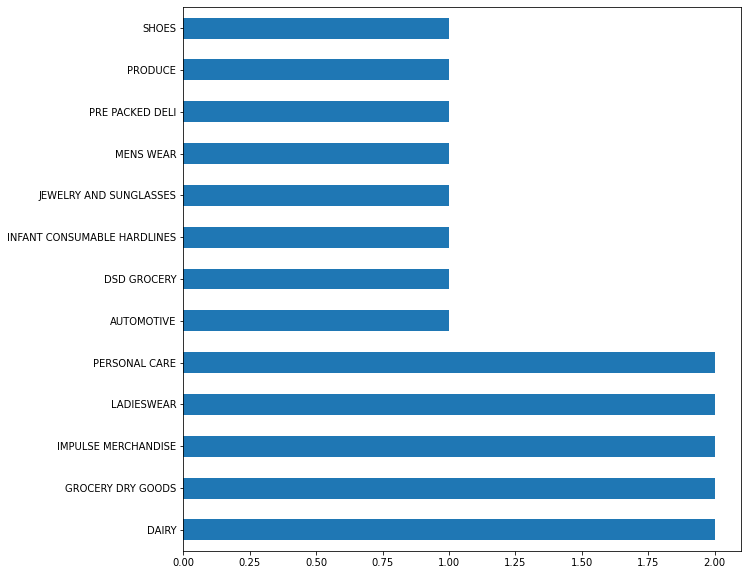

In [ ]:
pd.get_dummies(flattened_ds_dataset).sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10))
plt.show()

#Task II: Apriori - Part 1

## 2-A. Apriori()

In [ ]:
# Obtain a Collection of K-Itemsets and their Association Rules
association_rules = apriori(walmart_baskets,min_support=0.06,min_confidence=0.19,min_lift=1.01)
# Convert the Apriori Generator Datatype to a List for Processing
association_results = list(association_rules)
# Display to Become Familiar with Results
association_results

[RelationRecord(items=frozenset({' COOKIES', ' TOBACCO'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' TOBACCO'}

## 2-B. Parse()

In [ ]:
# Name the Results of the Apriori Algorithm
association_rules = apriori(walmart_baskets,min_support=0.06,min_confidence=0.19,min_lift=1.01)
# Call the Pre-Defined Parse Function from Demonstration I. Pass the Results of the Apriori Algorithm as its Argument.
parse(association_rules)

2-Itemset: {' COOKIES', ' TOBACCO'}
Support: 0.07
Rule 1: {' COOKIES'} -> {' TOBACCO'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', ' TOBACCO'}
Support: 0.07
Rule 2: {' TOBACCO'} -> {' COOKIES'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', 'CANDY'}
Support: 0.07
Rule 3: {' COOKIES'} -> {'CANDY'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', 'CANDY'}
Support: 0.07
Rule 4: {'CANDY'} -> {' COOKIES'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' TOBACCO', 'CANDY'}
Support: 0.07
Rule 5: {' TOBACCO'} -> {'CANDY'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' TOBACCO', 'CANDY'}
Support: 0.07
Rule 6: {'CANDY'} -> {' TOBACCO'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {'DAIRY', 'COMM BREAD'}
Support: 0.07
Rule 7: {'COMM BREAD'} -> {'DAIRY'}
Confidence: 0.62
Lift: 3.22


2-Itemset: {'DAIRY', 'COMM BREAD'}
Support: 0.07
Rule 8: {'DAIRY'} -> {'COMM BREAD'}
Confidence: 0.34
Lift: 3.22


2-Itemset: {'DSD GROCERY', 'COMM BREAD'}
Support: 0.07
Rule 9: {'COMM BREAD'} -> {'DSD GROCE

## 2-C. Description

In this dataset, when inserting the values of 0.06, 0.19, and 1.01 into paramaters min_support, min_confidence, and min_lift we get a total of 70 rules.
In order to return the specified K-Itemset required by the assignment we had to heavily decrease the values of our min_support and min_confidence but maintain a lift of at least 1.01 to still return positive corrilations. The 70 rules were made-up of (40) 2-Itemsets and (30) 3-Itemsets. With that said, this obviously led us to return many sets of unions due to our loose-set paramaters. Some intresting patterns that our rules displayed were; unhealthy items were usually purchased with other unhealthy items, groceries were purchased with more groceries together, and medical purchases came with personal health purchases.

Rules such as; 

*   COOKIES -> TOBACCO
*   COOKIES -> CANDY
*   PERSONAL CARE -> PHARMACY OTC
*   PRODUCE -> GROCERY DRY GOODS


#Task III: Apriori - Part 2

##3-A. Apriori()

In [ ]:
association_rules = apriori(walmart_baskets,min_support=0.06,min_confidence=0.7,min_lift=1.01)

association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({' COOKIES', ' TOBACCO'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' TOBACCO'}

##3-B. Parse()

In [ ]:
association_rules = apriori(walmart_baskets,min_support=0.06,min_confidence=0.7,min_lift=1.01)

parse(association_rules)

2-Itemset: {' COOKIES', ' TOBACCO'}
Support: 0.07
Rule 1: {' COOKIES'} -> {' TOBACCO'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', ' TOBACCO'}
Support: 0.07
Rule 2: {' TOBACCO'} -> {' COOKIES'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', 'CANDY'}
Support: 0.07
Rule 3: {' COOKIES'} -> {'CANDY'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', 'CANDY'}
Support: 0.07
Rule 4: {'CANDY'} -> {' COOKIES'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' TOBACCO', 'CANDY'}
Support: 0.07
Rule 5: {' TOBACCO'} -> {'CANDY'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' TOBACCO', 'CANDY'}
Support: 0.07
Rule 6: {'CANDY'} -> {' TOBACCO'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {'DSD GROCERY', 'COMM BREAD'}
Support: 0.07
Rule 7: {'COMM BREAD'} -> {'DSD GROCERY'}
Confidence: 0.7
Lift: 2.29


2-Itemset: {'GROCERY DRY GOODS', 'COMM BREAD'}
Support: 0.08
Rule 8: {'COMM BREAD'} -> {'GROCERY DRY GOODS'}
Confidence: 0.73
Lift: 3.37


2-Itemset: {'FROZEN FOODS', 'DSD GROCERY'}
Support: 0.07


##3-C. Description

In this dataset, when inserting the values of 0.06, 0.7, and 1.01 into paramaters min_support, min_confidence, and min_lift we get a total of 20 rules.
In order to return the specified K-Itemset required by the assignment we had to increase the value of our min_confidence but maintain a lift of at least 1.01 to still return positive corrilations. The 20 rules were made-up of (9) 2-Itemsets and (11) 3-Itemsets. With that said, this led us to return only some sets of unions rules due to our tighter-set paramaters. Some intresting patterns that our rules displayed were; unhealthy items were now usually leading to more than one purchase of other unhealthy items, groceries purchases lead to multiple purchases of more groceries.

Rules such as; 

*   TOBACCO -> COOKIES, CANDY
*   COOKIES -> CANDY
*   DAIRY, GROCERY DRY GOODS -> DSD GROCERY
*   PRODUCE -> GROCERY DRY GOODS


#Task IV: Apriori - Part 3

##4-A. Apriori()

In [ ]:
association_rules = apriori(walmart_baskets,min_support=0.06,min_confidence=0.19,min_lift=3.15)

association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({' COOKIES', ' TOBACCO'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' TOBACCO'}

##4-B. Parse()

In [ ]:
association_rules = apriori(walmart_baskets,min_support=0.06,min_confidence=0.19,min_lift=3.15)

parse(association_rules)

2-Itemset: {' COOKIES', ' TOBACCO'}
Support: 0.07
Rule 1: {' COOKIES'} -> {' TOBACCO'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', ' TOBACCO'}
Support: 0.07
Rule 2: {' TOBACCO'} -> {' COOKIES'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', 'CANDY'}
Support: 0.07
Rule 3: {' COOKIES'} -> {'CANDY'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' COOKIES', 'CANDY'}
Support: 0.07
Rule 4: {'CANDY'} -> {' COOKIES'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' TOBACCO', 'CANDY'}
Support: 0.07
Rule 5: {' TOBACCO'} -> {'CANDY'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {' TOBACCO', 'CANDY'}
Support: 0.07
Rule 6: {'CANDY'} -> {' TOBACCO'}
Confidence: 1.0
Lift: 14.29


2-Itemset: {'DAIRY', 'COMM BREAD'}
Support: 0.07
Rule 7: {'COMM BREAD'} -> {'DAIRY'}
Confidence: 0.62
Lift: 3.22


2-Itemset: {'DAIRY', 'COMM BREAD'}
Support: 0.07
Rule 8: {'DAIRY'} -> {'COMM BREAD'}
Confidence: 0.34
Lift: 3.22


2-Itemset: {'GROCERY DRY GOODS', 'COMM BREAD'}
Support: 0.08
Rule 9: {'COMM BREAD'} -> {'GRO

##4-C. Description

In this dataset, when inserting the values of 0.06, 0.19, and 3.15 into paramaters min_support, min_confidence, and min_lift we get a total of 30 rules.
In order to return the specified K-Itemset required by the assignment we had to increase the value of our min_lift to 3.15. This adjustment created many more rules unlike prior adjustmnets. The 30 rules were made-up of (12) 2-Itemsets and (18) 3-Itemsets. With that said, this led us to return a few more union sets than our last run due to the modification of our minimum lift threshold paramater. Genrally the same patterns were displayed. One thing I noticed was that Dairy seemed to now have a much stronger standing in leading to other grocery purchases. Other than that, increasing this paramater seemed to increase the amount of rules with multiple purchases leading to one more purchase.

Rules such as; 

*   TOBACCO'} -> {' COOKIES', 'CANDY
*   DAIRY, GROCERY DRY GOODS -> PRODUCE
*   DAIRY, PRODUCE -> GROCERY DRY GOODS
*   DAIRY -> PRODUCE GROCERY DRY GOODS


#Task V: IPYNB and HTML Files

## 5-A & B.

In [ ]:
%%shell
 jupyter nbconvert --to html Assignment10_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook Assignment10_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 379667 bytes to Assignment10_Abed_Abdulrahman.html
